<a href="https://colab.research.google.com/github/theaok/gisPy/blob/main/geoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pygeoda
!pip install mapclassify


In [29]:
import os, zipfile
import pygeoda
import geopandas as gpd

import mapclassify

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [72]:
!wget -q -O columbus.zip https://geodacenter.github.io/data-and-lab/data/columbus.zip
zip_ref = zipfile.ZipFile('columbus.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
!ls columbus
col=gpd.read_file('columbus/columbus.shp')

columbus.csv  columbus.geojson	columbus.kml  columbus.prj  columbus.sqlite
columbus.dbf  columbus.gpkg	columbus.mid  columbus.shp  columbus.xlsx
columbus.gdb  columbus.html	columbus.mif  columbus.shx


In [73]:
col.dtypes

AREA           float64
PERIMETER      float64
COLUMBUS_        int64
COLUMBUS_I       int64
POLYID           int64
NEIG             int64
HOVAL          float64
INC            float64
CRIME          float64
OPEN           float64
PLUMB          float64
DISCBD         float64
X              float64
Y              float64
NSA            float64
NSB            float64
EW             float64
CP             float64
THOUS          float64
NEIGNO         float64
geometry      geometry
dtype: object

In [49]:
col=col.drop(['AREA','PERIMETER','NSA','NSB','EW','CP'],axis=1)
col.head(2)

,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,PLUMB,DISCBD,X,Y,THOUS,NEIGNO,geometry
0,2,5,1,5,80.467003,19.531,15.725980,2.850747,0.217155,5.03,38.799999,44.070000,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ..."
1,3,1,2,1,44.567001,21.232,18.801754,5.296720,0.320581,4.27,35.619999,42.380001,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."


In [65]:
##import pyproj
##col.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
#px.choropleth(col, color="CRIME",locations=col.index, geojson=col.geometry
#                   )
colP = col.copy()
colP["geometry"] = colP["geometry"].centroid

<Axes: >

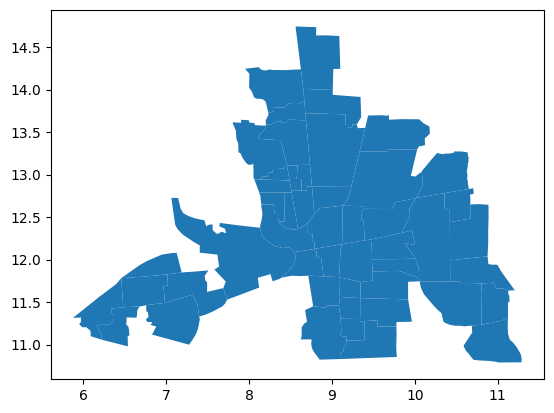

In [66]:
col.plot()

<Axes: >

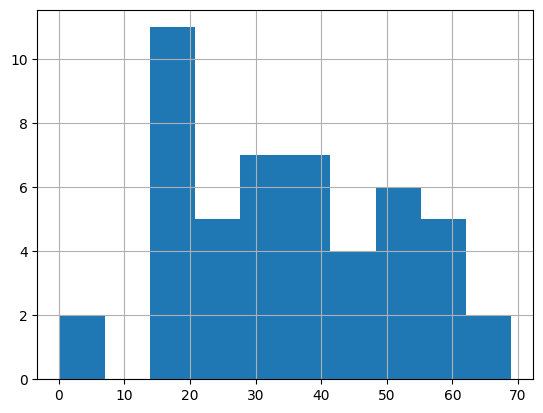

In [47]:
col.CRIME.hist()

Text(8.827218469203908, 14.369076018912063, '1')

Text(8.332658372724923, 14.031624006323966, '2')

Text(9.0122654093717, 13.819719079969147, '3')

Text(8.460800893307436, 13.716962170228141, '4')

Text(9.007982127497685, 13.296366430537292, '5')

Text(9.739925828001203, 13.474632743210716, '6')

Text(8.118750060628729, 13.295703867053538, '7')

Text(8.496488171957548, 13.402612361972409, '8')

Text(9.630793442508981, 12.942724931765364, '9')

Text(10.366382709801057, 13.00188936025309, '10')

Text(8.669735412857046, 12.98012156123324, '11')

Text(8.544995589641779, 12.9531256839822, '12')

Text(8.349223482851055, 12.996094141102331, '13')

Text(8.292701516920957, 12.863707688216895, '14')

Text(8.973462206070094, 12.741586740380376, '15')

Text(8.655866335560422, 12.62731580875412, '16')

Text(10.528621192777077, 12.647475597059021, '17')

Text(8.487918125725194, 12.545342471590063, '18')

Text(8.312367703365632, 12.666720813263051, '19')

Text(10.190581526179413, 12.256899149288648, '20')

Text(7.847423618980444, 12.084997322022751, '21')

Text(9.655244367498366, 12.462765864102984, '22')

Text(10.671381108158549, 12.291571317666135, '23')

Text(8.420744068273082, 12.318013434287653, '24')

Text(8.938751825549426, 12.380509826386751, '25')

Text(9.250921130765516, 12.413783516339139, '26')

Text(9.737004148455055, 12.149692840219398, '27')

Text(9.297975780128176, 11.977787924704433, '28')

Text(8.977861502440566, 11.994012072407754, '29')

Text(8.68871949319255, 11.938718355531323, '30')

Text(6.8924823259937416, 11.914150957988443, '31')

Text(10.76378352110245, 11.844431047650396, '32')

Text(9.783876039871148, 11.922708164579584, '33')

Text(7.33943071762272, 11.628545121558876, '34')

Text(9.668248963690393, 11.692541207168867, '35')

Text(6.728837547719331, 11.634364976122036, '36')

Text(8.912362855719714, 11.630310543083501, '37')

Text(9.210527335403754, 11.659838850006437, '38')

Text(6.221942933898136, 11.402513578924117, '39')

Text(10.492492572016708, 11.507197282569432, '40')

Text(10.95358743637645, 11.479245868637376, '41')

Text(7.1100509053908985, 11.295438892865233, '42')

Text(9.214330280393483, 11.432771789368283, '43')

Text(9.641904437882928, 11.391036212262494, '44')

Text(8.910340473827835, 11.148639078569653, '45')

Text(6.423385031583336, 11.219238093398321, '46')

Text(10.935302271773978, 11.010030663664562, '47')

Text(9.251957402833792, 11.181253873699427, '48')

Text(9.492143530360028, 11.014961106511862, '49')

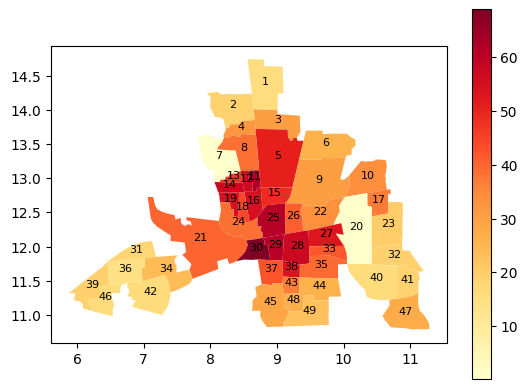

In [105]:
ax=col.plot(column='CRIME',legend=True,cmap='YlOrRd') #,scheme='quantiles',k=5
for x, y, label in zip(colP.geometry.x, colP.geometry.y, colP.POLYID):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=8) #ytext=(3, 3), textcoords="offset points"

Text(8.827218469203908, 14.369076018912063, '1')

Text(8.332658372724923, 14.031624006323966, '2')

Text(9.0122654093717, 13.819719079969147, '3')

Text(8.460800893307436, 13.716962170228141, '4')

Text(9.007982127497685, 13.296366430537292, '5')

Text(9.739925828001203, 13.474632743210716, '6')

Text(8.118750060628729, 13.295703867053538, '7')

Text(8.496488171957548, 13.402612361972409, '8')

Text(9.630793442508981, 12.942724931765364, '9')

Text(10.366382709801057, 13.00188936025309, '10')

Text(8.669735412857046, 12.98012156123324, '11')

Text(8.544995589641779, 12.9531256839822, '12')

Text(8.349223482851055, 12.996094141102331, '13')

Text(8.292701516920957, 12.863707688216895, '14')

Text(8.973462206070094, 12.741586740380376, '15')

Text(8.655866335560422, 12.62731580875412, '16')

Text(10.528621192777077, 12.647475597059021, '17')

Text(8.487918125725194, 12.545342471590063, '18')

Text(8.312367703365632, 12.666720813263051, '19')

Text(10.190581526179413, 12.256899149288648, '20')

Text(7.847423618980444, 12.084997322022751, '21')

Text(9.655244367498366, 12.462765864102984, '22')

Text(10.671381108158549, 12.291571317666135, '23')

Text(8.420744068273082, 12.318013434287653, '24')

Text(8.938751825549426, 12.380509826386751, '25')

Text(9.250921130765516, 12.413783516339139, '26')

Text(9.737004148455055, 12.149692840219398, '27')

Text(9.297975780128176, 11.977787924704433, '28')

Text(8.977861502440566, 11.994012072407754, '29')

Text(8.68871949319255, 11.938718355531323, '30')

Text(6.8924823259937416, 11.914150957988443, '31')

Text(10.76378352110245, 11.844431047650396, '32')

Text(9.783876039871148, 11.922708164579584, '33')

Text(7.33943071762272, 11.628545121558876, '34')

Text(9.668248963690393, 11.692541207168867, '35')

Text(6.728837547719331, 11.634364976122036, '36')

Text(8.912362855719714, 11.630310543083501, '37')

Text(9.210527335403754, 11.659838850006437, '38')

Text(6.221942933898136, 11.402513578924117, '39')

Text(10.492492572016708, 11.507197282569432, '40')

Text(10.95358743637645, 11.479245868637376, '41')

Text(7.1100509053908985, 11.295438892865233, '42')

Text(9.214330280393483, 11.432771789368283, '43')

Text(9.641904437882928, 11.391036212262494, '44')

Text(8.910340473827835, 11.148639078569653, '45')

Text(6.423385031583336, 11.219238093398321, '46')

Text(10.935302271773978, 11.010030663664562, '47')

Text(9.251957402833792, 11.181253873699427, '48')

Text(9.492143530360028, 11.014961106511862, '49')

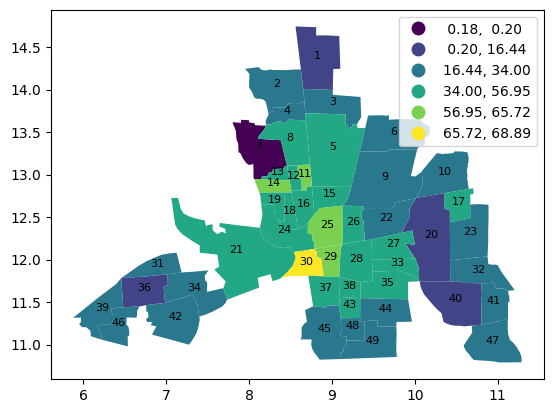

In [106]:
ax=col.plot(column='CRIME',legend=True,scheme='percentiles') #focus on outliers
for x, y, label in zip(colP.geometry.x, colP.geometry.y, colP.POLYID):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=8) #ytext=(3, 3), textcoords="offset points"

In [50]:
import plotly.express as px
px.scatter(col, x="CRIME", y="HOVAL",
                  hover_data=['POLYID'],width=1000,height=600)